In [2]:
import pandas as pd

iris_data = pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data = pd.read_csv('iris-data.csv', na_values=['NA'])

In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

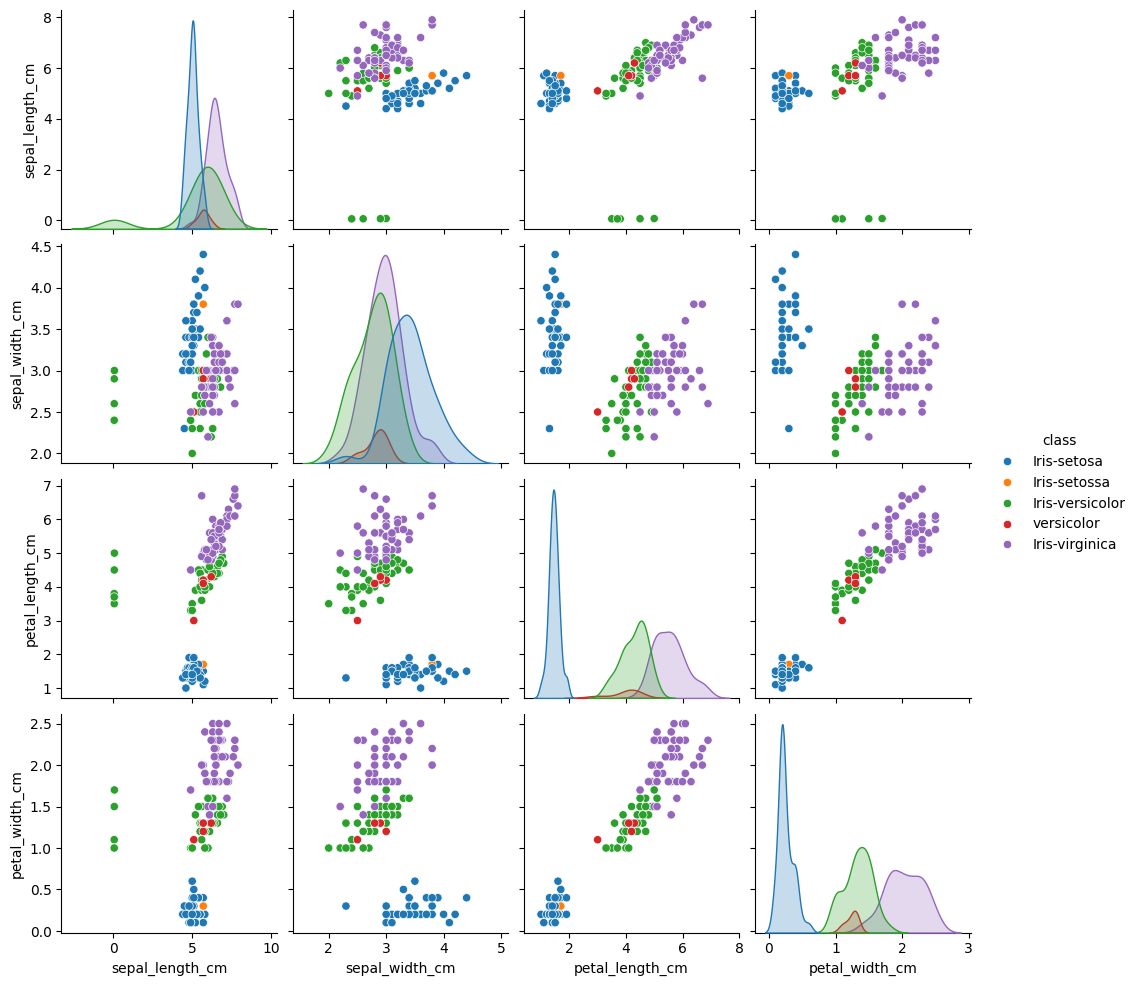

In [6]:
sb.pairplot(iris_data.dropna(), hue='class')

In [10]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot: >

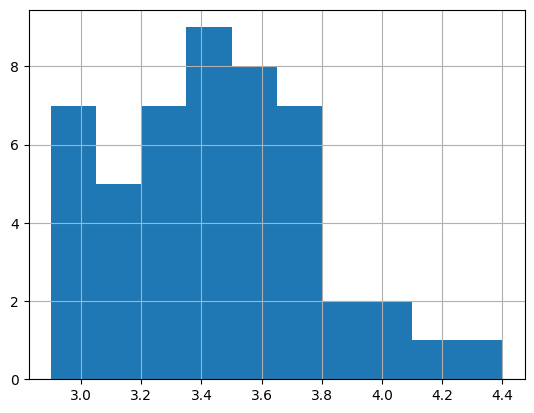

In [11]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [12]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


<AxesSubplot: >

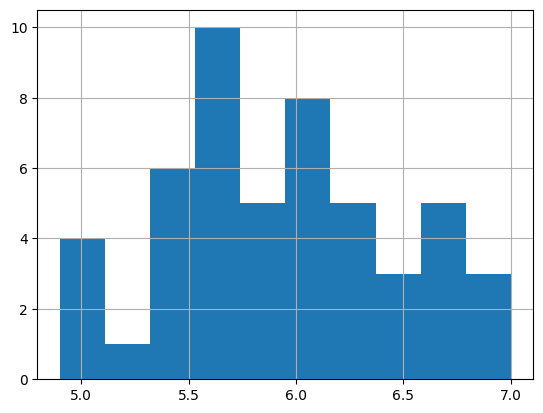

In [14]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0), 'sepal_length_cm'] *= 100
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [16]:
iris_data.loc[iris_data['petal_length_cm'].isnull() |
                iris_data['petal_width_cm'].isnull() |
                iris_data['sepal_length_cm'].isnull() |
                iris_data['sepal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


<AxesSubplot: >

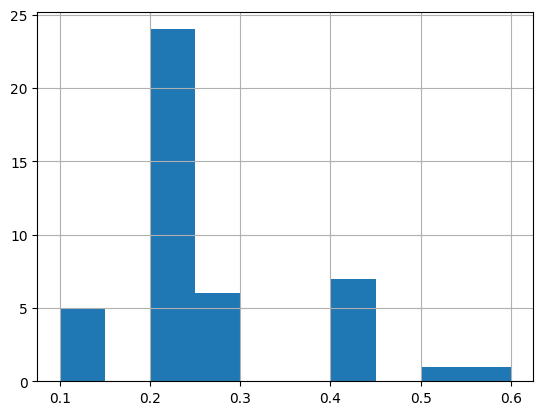

In [17]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [20]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
                (iris_data['petal_width_cm'].isnull()),
                'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
                (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [21]:
iris_data.loc[iris_data['petal_length_cm'].isnull() |
                iris_data['petal_width_cm'].isnull() |
                iris_data['sepal_length_cm'].isnull() |
                iris_data['sepal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [22]:
iris_data.to_csv('iris-data-clean.csv', index='False')

In [23]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

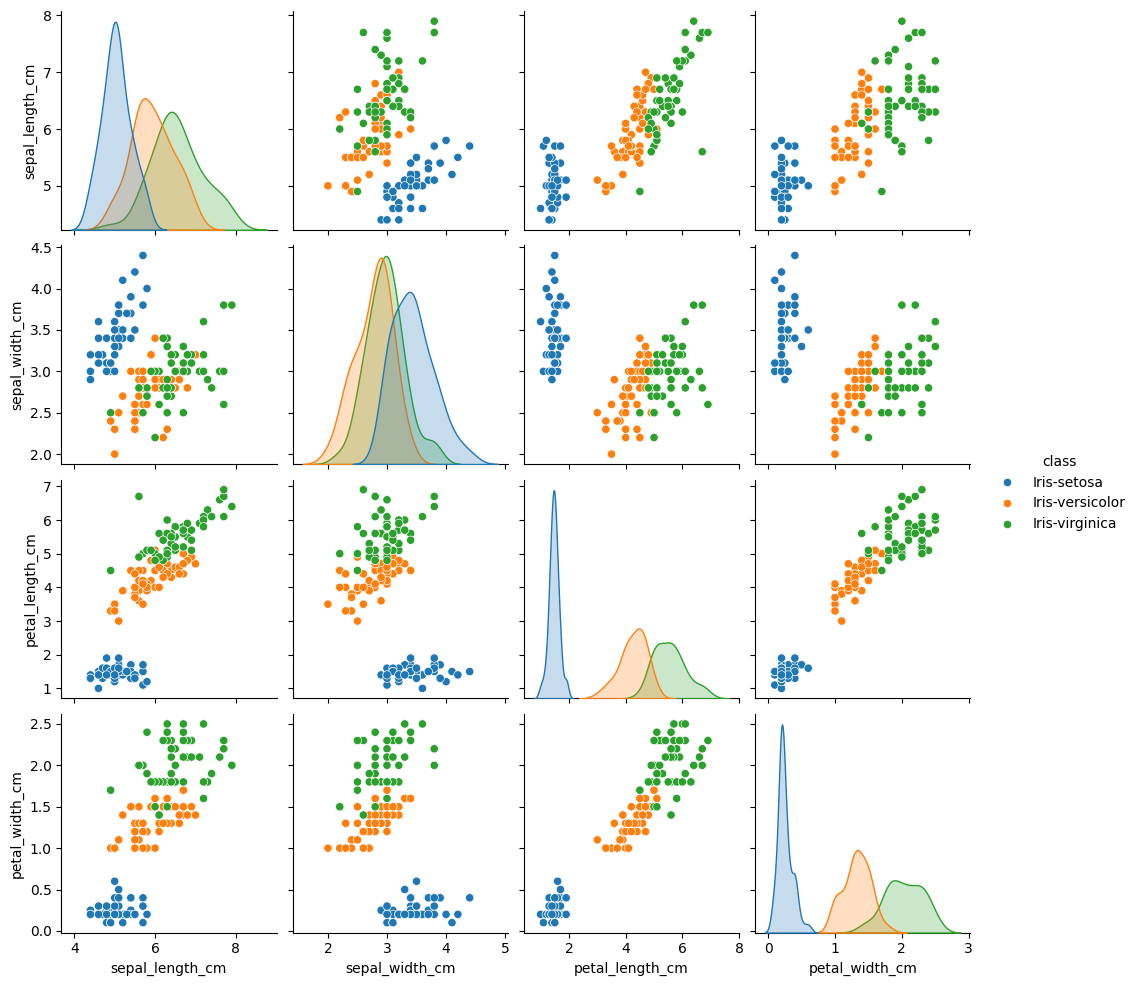

In [35]:
sb.pairplot(iris_data_clean, hue='class')


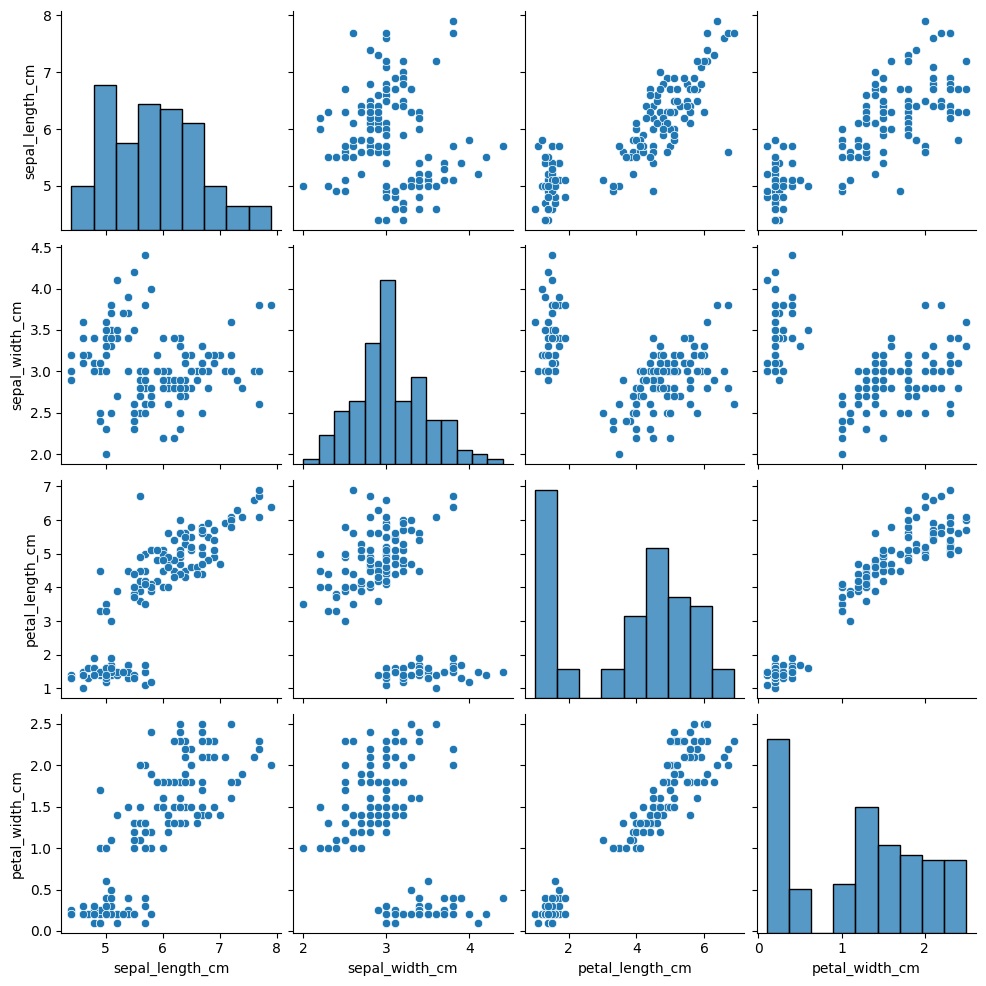

In [36]:
sb.pairplot(iris_data_clean)

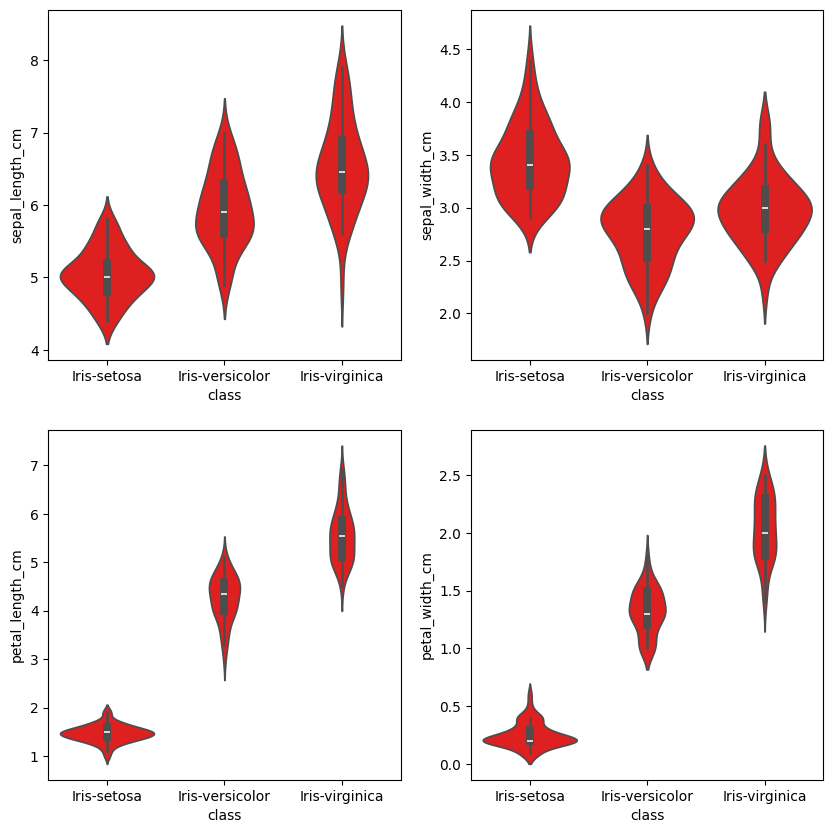

In [38]:
plt.figure(figsize=(10, 10))

for index, col in enumerate(iris_data_clean.columns):
    if col == 'class':
        continue
    plt.subplot(2, 2, index + 1)
    sb.violinplot(x = 'class', y=col, data=iris_data_clean, color='red')

In [39]:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
from sklearn.model_selection import train_test_split

(training_inputs, 
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [41]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)

decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

(array([  4.,   8.,  27.,   0.,  92., 232.,   0., 284., 244., 109.]),
 array([0.81578947, 0.83421053, 0.85263158, 0.87105263, 0.88947368,
        0.90789474, 0.92631579, 0.94473684, 0.96315789, 0.98157895,
        1.        ]),
 <BarContainer object of 10 artists>)

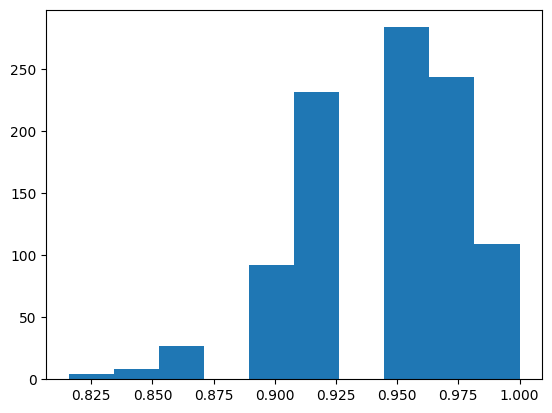

In [43]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

## Cross-validation

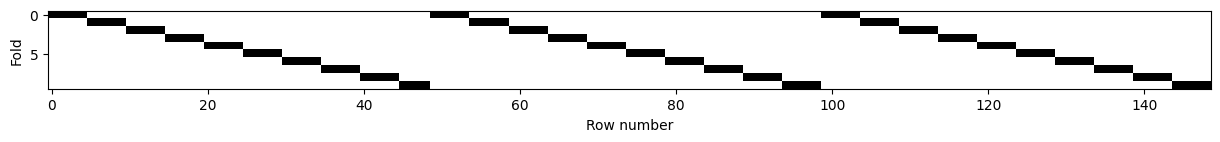

In [45]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)

    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row number')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Text(0.5, 1.0, 'Average score: 0.96')

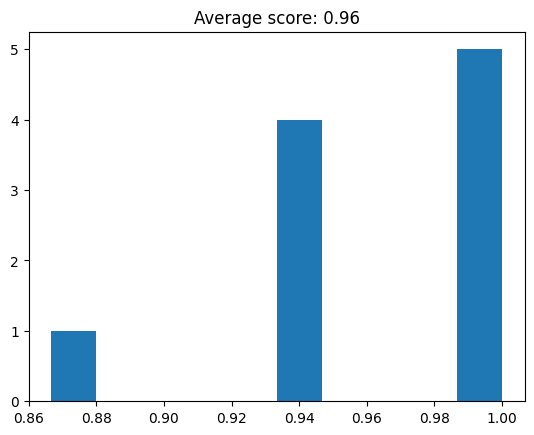

In [48]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

plt.hist(cv_scores)
plt.title(f'Average score: {format(np.mean(cv_scores))}')

Text(0.5, 1.0, 'Average score: 0.6642857142857144')

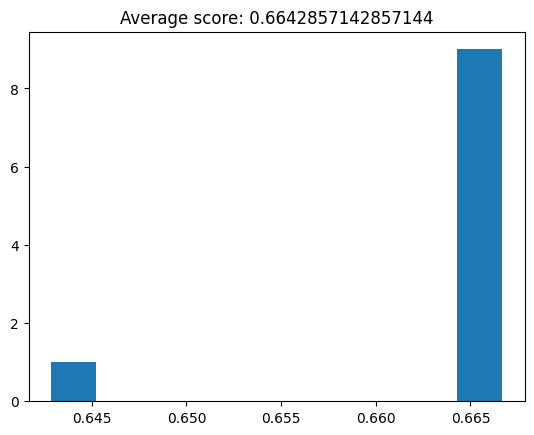

In [49]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title(f'Average score: {format(np.mean(cv_scores))}')

In [52]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

param_grid = {'max_depth' : [1, 2, 3, 4, 5],
                'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid=param_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print(f'Best score: {format(grid_search.best_score_)}')
print(f'Best parameters: {format(grid_search.best_params_)}')



Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 3}


Text(0.5, 23.52222222222222, 'max_features')

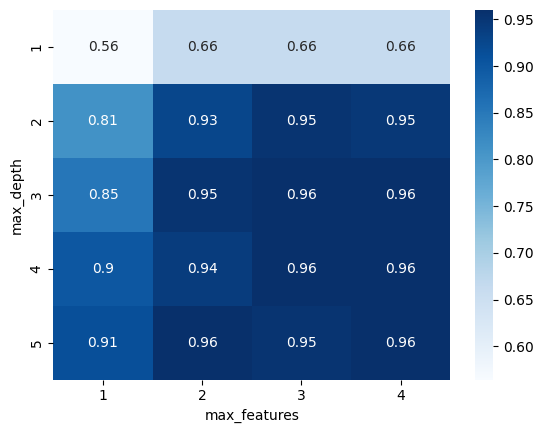

In [54]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.ylabel('max_depth')
plt.xlabel('max_features')

In [55]:
decision_tree_classifier = DecisionTreeClassifier()

param_grid = {'criterion' : ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
                'max_depth' : [1, 2, 3, 4, 5],
                'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                            param_grid=param_grid,
                            cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print(f'Best score: {format(grid_search.best_score_)}')
print(f'Best parameters: {format(grid_search.best_params_)}')

Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'splitter': 'random'}


In [56]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=3, splitter='random')

In [57]:
import sklearn.tree as tree
from six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)



<AxesSubplot: >

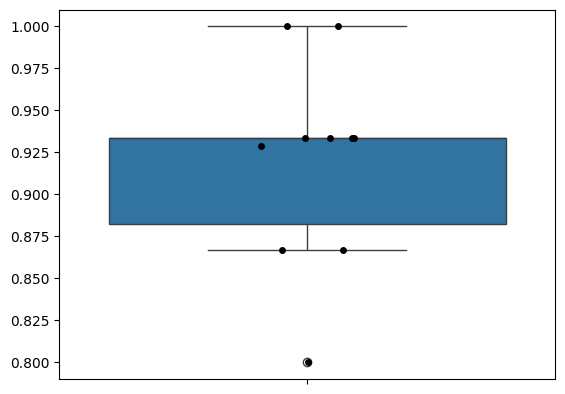

In [59]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')

In [60]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

param_grid = {'n_estimators' : [10, 25, 50, 100],
                'criterion' : ['gini', 'entropy'],
                'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print(f'Best score: {format(grid_search.best_score_)}')
print(f'Best parameters: {format(grid_search.best_params_)}')


Best score: 0.9666666666666666
Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 100}


/var/folders/4d/gcfrd7757vb6dtk08cq18x1c0000gn/T/ipykernel_75898/1059386438.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both_df = rf_df.append(dt_df)


<AxesSubplot: xlabel='classifier', ylabel='accuracy'>

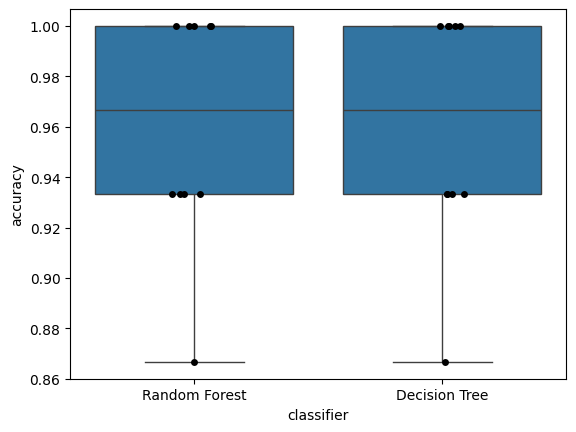

In [62]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy' : cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                        'classifier' : ['Random Forest'] * 10})

dt_df = pd.DataFrame({'accuracy' : cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                        'classifier' : ['Decision Tree'] * 10})

both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')